In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [49]:
train = pd.read_csv("titanic_train.csv")
test = pd.read_csv("titanic_test.csv")

## Exploratory Data Analysis

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

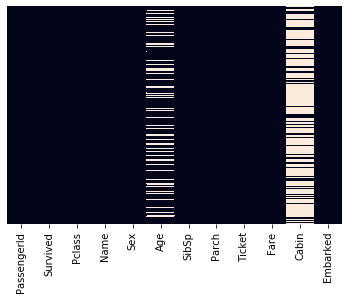

In [5]:
# Use Seaborn heatmap to see where we are issing data

sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
sns.set_style("darkgrid")

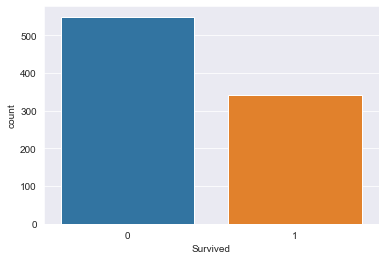

In [8]:
sns.countplot(x="Survived", data=train)

In [9]:
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

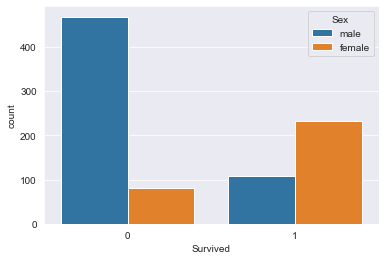

In [10]:
sns.countplot(x="Survived", data=train, hue="Sex")

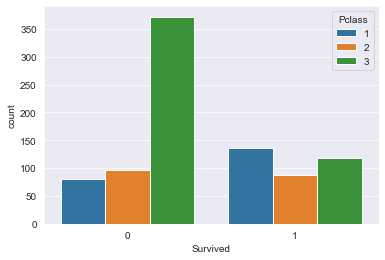

In [11]:
sns.countplot(x="Survived", data=train, hue="Pclass")

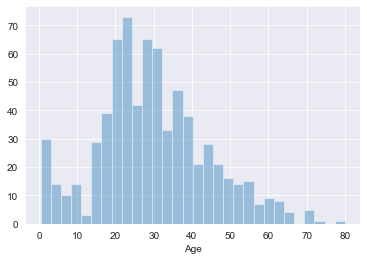

In [12]:
# We notice a few trends. People who did not survive seemed to be mostly males
# People who did not survive were also mostly from Pclass 3

sns.distplot(train["Age"].dropna(), kde=False, bins=30)

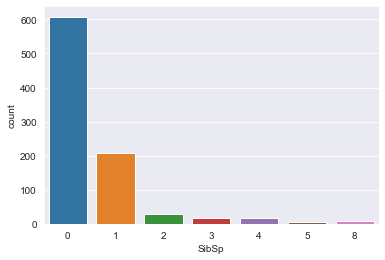

In [13]:
sns.countplot(x="SibSp", data=train)

# Most people on board did not have neither children or spouse on board

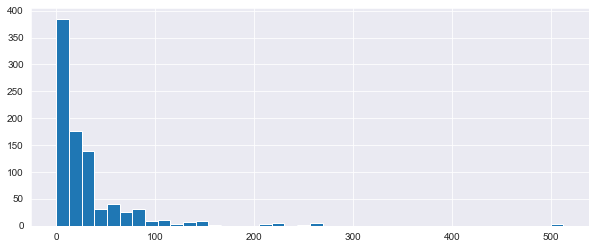

In [14]:
train["Fare"].hist(bins=40, figsize = (10,4))

# Most of the purchase prices are between 0 and 50. Which makes sense because most of the passengers are 
# in the 3rd Class

In [15]:
train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

## Cleaning Our Data

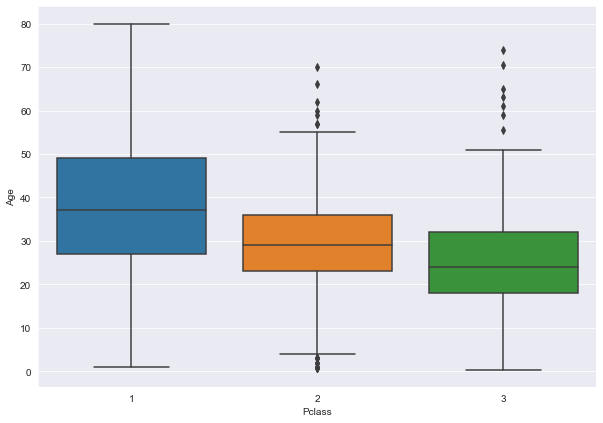

In [16]:
# Filling in mean age of all passengers by passenger class (imputation)

plt.figure(figsize=(10,7))
sns.boxplot(x="Pclass", y="Age", data=train)

# We notice that passengers in the 1st and 2nd class tend to be older than passengers in 3rd class

In [22]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [50]:
train["Age"] = train[["Age", "Pclass"]].apply(impute_age, axis=1)

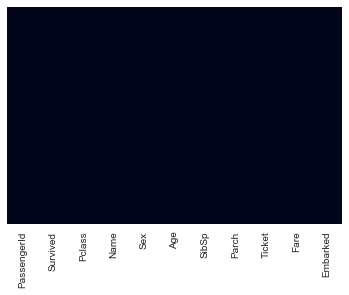

In [56]:
sns.heatmap(train.isnull(), yticklabels=False, cbar = False)

In [52]:
train.drop(columns="Cabin", inplace=True)

In [54]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [55]:
train.dropna(inplace=True)


In [62]:
# Now we have no more missing values. We filled in some and dropped in some
# Now we have to deal with categorical features
# We need to dummify them
# For example "Sex" column, we have to create a new column giving a 0 or 1 value if male or not.
# Same fo Embarked column

sex = pd.get_dummies(train["Sex"], drop_first = True)

# Here we will have multicolineratity since one colum will perfectly predict the other
# Se we drop one of those two columns (drop_first = True)

In [67]:
# Same with Embark column. We dropped one of the columns for the same reason

embark = pd.get_dummies(train["Embarked"], drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [71]:
train = pd.concat([train, sex, embark], axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,1,0,1


In [75]:
# Now we dont need embark and sex column. And we wont use Ticket or Name column either

train.drop(["Sex", "Embarked", "male", "Q", "S", "Name", "Ticket"], inplace=True, axis=1)

In [76]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [78]:
# We notice that the PassengerID is just an index which starts at 1
train.drop(columns = "PassengerId", inplace=True)

In [79]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


## Predictions

In [80]:
# In this example, we will use the "Train" dataframe as if it was the entirety of our data.

X = train.drop("Survived", axis=1)
y = train["Survived"]

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
logmodel = LogisticRegression()

In [89]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
predictions = logmodel.predict(X_test)

In [94]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [93]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.88      0.80       163
           1       0.72      0.49      0.58       104

    accuracy                           0.73       267
   macro avg       0.72      0.68      0.69       267
weighted avg       0.73      0.73      0.71       267



In [95]:
print(confusion_matrix(y_test, predictions))

[[143  20]
 [ 53  51]]
